# **Lab #19: Improving Deep Learning models**
---

### **Description**
In this week's lab you'll experiment with different parameters for fine-tuning deep learning models. Hyperparameters are the parameters that define the architecture and learning process of a neural network, such as the number of layers, the number of neurons in each layer, the activation function used, and the learning rate used by the optimization algorithm. By experimenting with different hyperparameters, we can optimize the performance of the neural network and achieve better results. This will cover key topics such as:

  * Training neural networks
  * Comparing activation functions
  * Different optimizers
  * Hyperparameter tuning
  * Automatic hyperparameter tuning

<br>


**Dataset Description:** This lab involves the MNIST dataset. The [MNIST](http://yann.lecun.com/exdb/mnist/) dataset is a large collection of handwritten digits that is widely used for training and testing machine learning models. It consists of 60,000 training images and 10,000 testing images of handwritten digits ranging from 0 to 9. The images are 28x28 pixels in size and are grayscale. MNIST is considered a benchmark dataset in the field of computer vision and machine learning, and it is a good starting point for learning and testing algorithms.
<br>

### **Goals** 
By the end of this lab, you will:
* Train and evaluate a Neural Network for image classification.
* Learn to do manual and automatic hyperparameter tuning using Random Search for activation functions, optimizer algorithms (Stochastic Gradient Descent vs Adam), learning rate and model architecture (layers and neurons). 
<br>


### **Cheat Sheets**: 
[Updated Deep Learning with keras](https://docs.google.com/document/d/1z-UBO-Gt9QFwknH7B2CLQdRX3-Ly6ETr/edit?usp=sharing&ouid=101998331531919586698&rtpof=true&sd=true)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**

In [ ]:
from keras.models import Sequential
from keras.layers import *

from IPython.display import Image

from keras.datasets import mnist
from keras.optimizers import Adam, SGD

from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

## **Part #1: Practice Together with MNIST**
---
In this first part, we'll build a deep neural network using the 8 steps you've seen so far on the MNIST datasets.
*In this practice together, we will create a neural net that can classify the handwritten digits from this data set.*
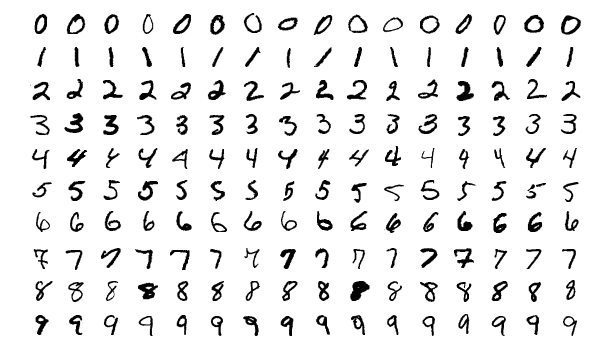


---

#### **Step #1: Import and and split the data into training/testing** 
---

*This is completed for you. Just run the code below!*

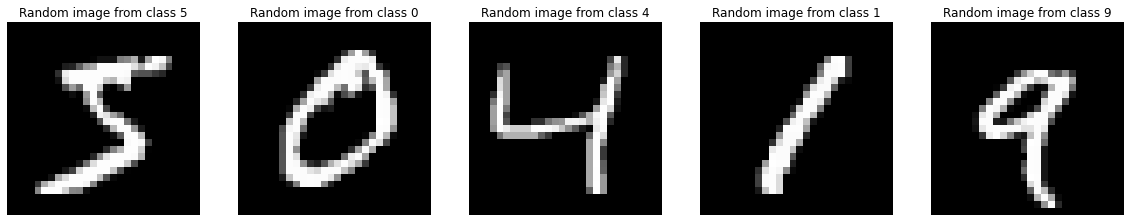

In [ ]:
# import
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Show a few images from the dataset
plt.figure(figsize=(20,5))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.title(f"Random image from class {y_train[i]}")
  plt.imshow(x_train[i], cmap='gray')
  plt.axis("off")

plt.show()


# Convert labels to categorical for loss function evaluation.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


x_train = x_train / 255
x_test = x_test / 255

### **Step #2:** Determine the dimension of the data
---
In this step, you need to determine if the data needs to be flattened. **Determine the dimension of the data with `x_train.shape`.**

Based on the output that you see, for more than two dimensions the data need to be flattened during step #3 (i.e. if your output is `(10, 5)` it doesn't need to be flattened, however, if it's `(10, 5, 2)` it would need to be flattened). 

In [ ]:
x_train.shape

(60000, 28, 28)

### **Step #3-6:** Building the model
---

Most of the steps are given to you. Add a `Flatten` layer with the input shape that you found from above. 

In [ ]:
# Build the model
model = Sequential()

# Add input layer (add a Flatten layer with the correct input shape)
model.add(Flatten(input_shape = (28,28)))
# Add hidden layer 
model.add(Dense(256, activation='relu'))

# Add output layer
model.add(Dense(10, activation='sigmoid'))


---

<center>

#### **Back to Lecture**
---

#### **Step #7: Fit the model**
---
Use Stochastic Gradient Descent (`SGD`) and set the learning rate to 0.01.

*Most of the code is given to you.*

In [ ]:
# Set the Optimizer and Learning Rate
opt = SGD(learning_rate = 0.01)
# Compile the DNN
model.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

# Fit the model
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.8485 - accuracy: 0.7989
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.4075 - accuracy: 0.8905
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.3449 - accuracy: 0.9037
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3121 - accuracy: 0.9120
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.2895 - accuracy: 0.9177


In [ ]:
# Set the Optimizer and Learning Rate
opt = SGD(learning_rate=0.01)

# Compile the DNN
model.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

# Fit the model
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0722 - accuracy: 0.9784
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0661 - accuracy: 0.9800
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0640 - accuracy: 0.9805
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0628 - accuracy: 0.9808
Epoch 5/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0619 - accuracy: 0.9811


#### **Step #8: Evaluate the model**
---

Like with all other machine learning models, it is important to validate our training to ensure a good fit to the data.

We can use the `model.evaluate(x_data, y_data)[1]` to get the value of correctly classified x_data points. We can multiply this value by 100 to get the percentage of correctly classified datapoints.

**Complete the code below to print the percentage of correctly classified datapoints for both the train and test sets respectively.**

In [ ]:
correct_x_train = model.evaluate(x_train, y_train)[1]
correct_x_test = model.evaluate(x_test, y_test)[1]

print(f"Train Accuracy: {correct_x_train*100}%")
print(f"Test Accuracy: {correct_x_test*100}%")

313/313 [==============================] - 2s 6ms/step - loss: 0.2696 - accuracy: 0.9250
Train Accuracy: 92.1750009059906%
Test Accuracy: 92.5000011920929%


#### **Step #9: Visualize the model's predictions**
---

Now, run the code below to make predictions with the model and output its predictions for digits in the test set.

313/313 [==============================] - 1s 2ms/step


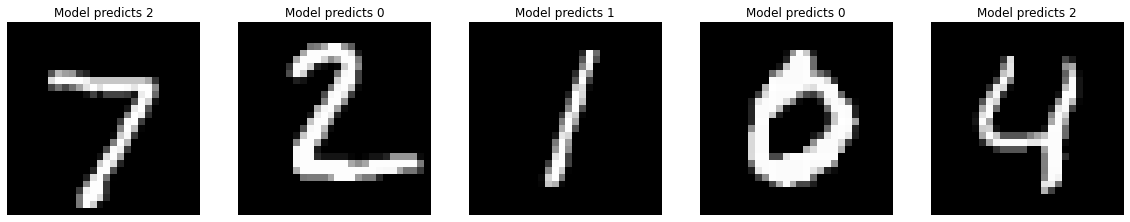

In [ ]:
# Make predictions and convert from probabilities of each digit to single digit
predictions = [np.argmax(d) for d in np.round(model.predict(x_test))]

# Plot images with predicted labes
plt.figure(figsize=(20,5))

for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.title(f"Model predicts {predictions[i]}")
  plt.imshow(x_test[i], cmap='gray')
  plt.axis("off")

plt.show()

---

<center>

#### **Back to Lecture**
---

## **Part #2: Hyperparameter Tuning**
---

### **Part #2.1: Hyperparameter Tuning: Choosing an Optimizer**
---

Let's build an identical deep neural network like the above. 

*This code is given to you.*

In [ ]:
# Create model
model2 = Sequential()

# Input (Flatten) Layer
model2.add(Flatten(input_shape = (28, 28)))

# Hidden Layer
model2.add(Dense(256, activation='relu'))

# Output Layer
model2.add(Dense(10, activation='sigmoid'))

#### **Problem #1: Fit the model using Adam optimizer**
---
Our goal is to see if the model can perform better with a different optimizer.
**Change the optimizer to Adam with the same learning rate we used earlier 0.01.**

**Note**:  Hyperparameter tuning is done on a validation set before using on an actual test set. 

In [ ]:
# Set the Optimizer and Learning Rate
opt = Adam(learning_rate = 0.01)
# Compile the DNN
model2.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

# Fit the model
model2.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.2165 - accuracy: 0.9345
Epoch 2/5
938/938 [==============================] - 4s 5ms/step - loss: 0.1310 - accuracy: 0.9623
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1165 - accuracy: 0.9676
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1070 - accuracy: 0.9727
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0943 - accuracy: 0.9750


#### **Problem #2: Evaluate the model**
---

Run the cell to evaluate the model that has been trained with Adam.

In [ ]:
correct_x_train = model2.evaluate(x_train, y_train)[1]
correct_x_test = model2.evaluate(x_test, y_test)[1]

print(f"Train Accuracy: {correct_x_train*100}%")
print(f"Test Accuracy: {correct_x_test*100}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.3145 - accuracy: 0.9741
Train Accuracy: 99.15000200271606%
Test Accuracy: 97.40999937057495%


#### **Discussion: How did your model accuracy rate change?** 

---

<center>

#### **Back to Lecture**
---

### **Part #2.2: Hyperparameter Tuning: Comparing activation functions**
---

#### **Problem #1: Compare activation functions**
---
In this section, we will conduct hyperparameter tuning for activation functions. We modify our initial model to use `softmax` in the output layer instead of the previous `sigmoid` function. 

**Fill in the code to test for activation functions relu, softmax, sigmoid, tanh.** You do not need to worry about the rest of the code, only complete the part for the list of activation functions, noted with `## FILL IN THE CODE HERE ##`.

In [ ]:
# Define a function to create a model with a given activation function and learning rate
def create_model(activation):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(256, activation=activation))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define a list of activation functions to test
activations = ['sigmoid', 'tanh', 'relu', 'softmax']

# Train and evaluate models with different activation functions
for activation in activations:
    model = create_model(activation)
    history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
    train_accuracy = model.evaluate(x_train, y_train)[1]
    test_accuracy = model.evaluate(x_test, y_test)[1]

    #Print the train and test accuracy for each activation function
    print(f"Activation Function: {activation.name_}")
    print(f"Train Accuracy: {train_accuracy*100}%")
    print(f"Test Accuracy: {test_accuracy*100}%")

    # Plot the performance for each activation function
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title(f'Training and Validation Accuracy for {activation.__name__}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()


Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 0.2249 - accuracy: 0.9317 - val_loss: 0.1237 - val_accuracy: 0.9616
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1006 - accuracy: 0.9692 - val_loss: 0.1035 - val_accuracy: 0.9667
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0752 - accuracy: 0.9764 - val_loss: 0.0866 - val_accuracy: 0.9750
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0633 - accuracy: 0.9795 - val_loss: 0.0941 - val_accuracy: 0.9708
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0972 - accuracy: 0.9740


AttributeError: ignored

#### **Discuss: Which activation function works best for our model? What is now the accuracy rate using that activation function?**


---

<center>

#### **Back to Lecture**
---

## [OPTIONAL] **Part #3: Automated Hyperparameter Tuning**
> **Random Search (units, learning rate, optimizer and loss function)**
---
So far, we've manually changed different parameters to improve model performance. However, a faster alternative is automated hyperparameter tuning. One popular method for this is **Random Search**. It selects random values for hyperparameters such as learning rate, number of neurons, and batch size to find the optimal configuration. This way it becomes easier and faster to explore the potential space of hyperparameters, which can lead to an improvement in the speed and accuracy of the model.

As you saw in this lab, we managed to improve our model from an accuracy of 92% to 98% by tweaking different parameters. This is known as manual hyperparameter tuning. 
<!-- 
*Fun fact: Random Search is commonly used since it can outperform grid search (another automated option), where a specified range is searched systematically for every hyperparameter.* -->

In this section, by using built-in tuner from TensorFlow and Keras, we build a model, and use RandomSearch to tune hyperparameters for optimal performance on the MNIST dataset. The tuner then finds the best hyperparameters and uses them to evaluate the model.

#### **Problem #1: Random Search for hyperparameters**
---
**Fill in the code the best choices for:**
> **learning rate**: 1e-2, 1e-3, 1e-4 (or you can use any others you've seen throughout the labs, like 0.1, 0.001)\
> **optimizer**: your choice of optimizer (Adam, SGD or another)\
> **loss function**: your choice of the loss function (we've used so far `categorical_crossentropy`, you can alternatively try `mean_squared`).

You do not need to worry about the rest of the code, only complete the part for the hyperparameters noted with `## FILL IN THE CODE HERE ##`. `hp` is the notation for hyperparameter.

In [ ]:
!pip install keras-tuner

from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the image data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Define the hyperparameter search space
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))

    # Add a dense layer with variable number of units
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32) 
    model.add(layers.Dense(units=hp_units, activation='relu'))

    # Add a variable learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[]) # FILL HERE with values for learning rate hyperparameter
    optimizer = #keras.optimizers.(learning_rate=hp_learning_rate) # FILL after `optimizers.` with optimizer of your choice

    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, #loss='', metrics=['accuracy']) # FILL HERE with the loss function of your choice
    return model


# Instantiate the tuner
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='my_dir', project_name='mnist')

# Search for the best hyperparameters
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(1)[0]
print("Best hyperparameters:")
print(best_hp.values)

# Evaluate the best model
loss, accuracy = best_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy*100}%")

# **NOTE:** There are many calulations needed for this and it may take a few minutes. Please be patient!


##### **Discussion: What are the hyperparameters selected? What do these mean for the model? Compare the current accuracy rate to the initial one of our model.**

####**Reflect: What approach will you use to do hyperparameter tuning for your future models? Let us know why in the cell below.**

In [ ]:
##########################################
# ENTER ANSWER AS COMMENT HERE
#
#
##########################################

---
###© 2023 The Coding School, All rights reserved